<a href="https://colab.research.google.com/github/jatinmic1/PROJECTS-PUBLIC/blob/main/JATIN_AGARWAL_EDA_ON_AirBnb_Bookings_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

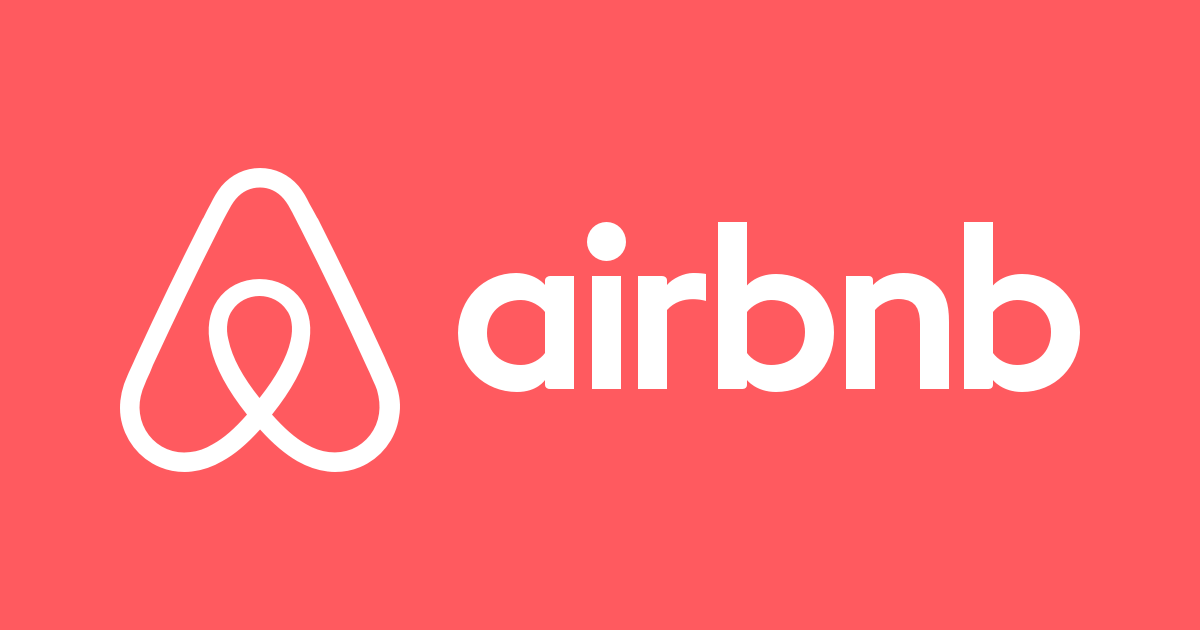

### **Business Context**

---

Since 2008, guests and hosts have used Airbnb to expand on travelling possibilities and present a more unique, personalised way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analysed and used for security, business decisions, understanding of customers' and providers' (hosts) behaviour and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. 

This dataset has around 49,000 observations in it with 16 columns and it is a mix of categorical and numeric values. Let's Explore and analyse the data to discover key understandings.

---



---



### **Project Architecture**



---



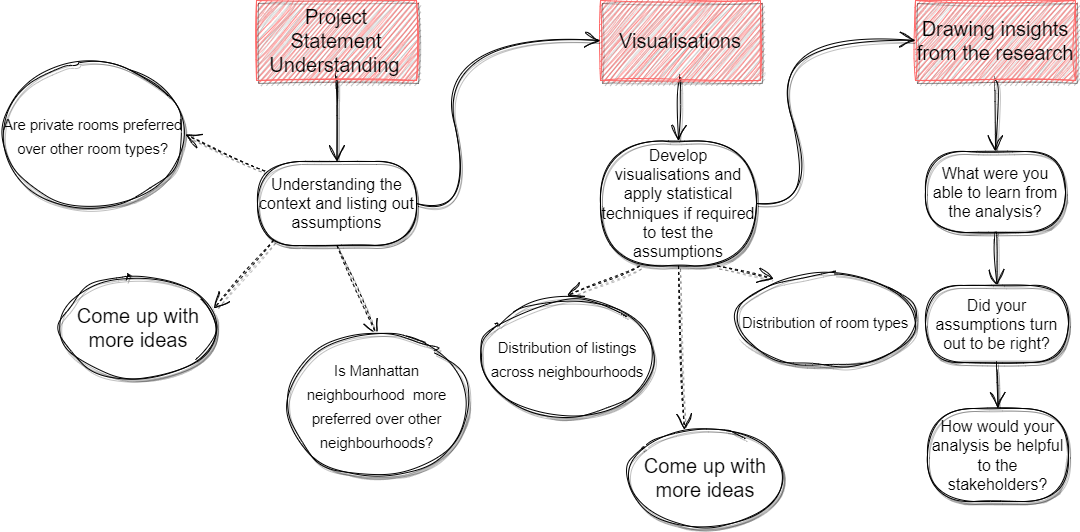

### **Feature information in details**

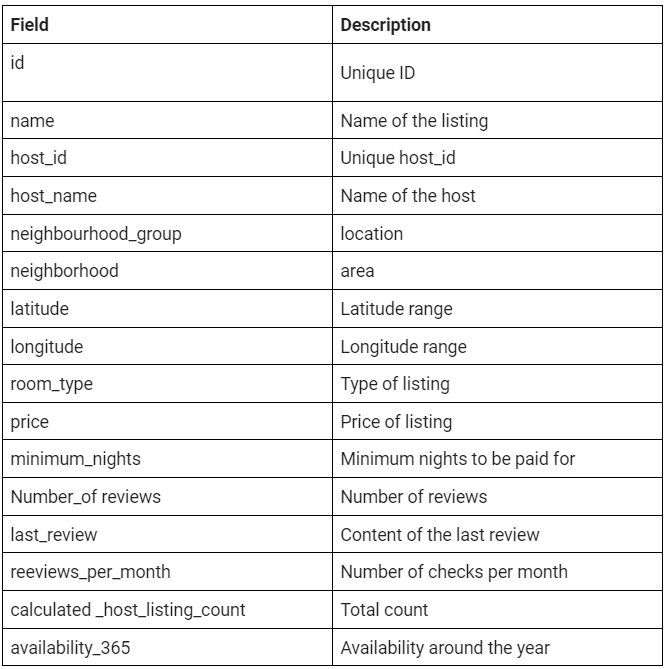

### **Importing required Libraries**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dir_path='/content/drive/MyDrive/EDA PROJECT/airbnb.csv'

In [ ]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### **Lets look at the first five rows**

In [ ]:
#reading the dataset

booking_df = pd.read_csv('/content/drive/MyDrive/EDA PROJECT/airbnb.csv')
booking_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


### **Checking the sahpe of the dataset shows rows and columns**

In [ ]:
print(f'This dataset has {booking_df.shape} rows and columns respectively.')

This dataset has (48895, 16) rows and columns respectively.


### **info( ) gives overall information about the missing values and the data type of columns**

In [ ]:
booking_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

### **Checking for the null values and null values percentage & Visually representing it**

In [ ]:
booking_df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [ ]:
round(booking_df.isnull().sum()/len(booking_df) * 100, 2)

id                                 0.00
name                               0.03
host_id                            0.00
host_name                          0.04
neighbourhood_group                0.00
neighbourhood                      0.00
latitude                           0.00
longitude                          0.00
room_type                          0.00
price                              0.00
minimum_nights                     0.00
number_of_reviews                  0.00
last_review                       20.56
reviews_per_month                 20.56
calculated_host_listings_count     0.00
availability_365                   0.00
dtype: float64

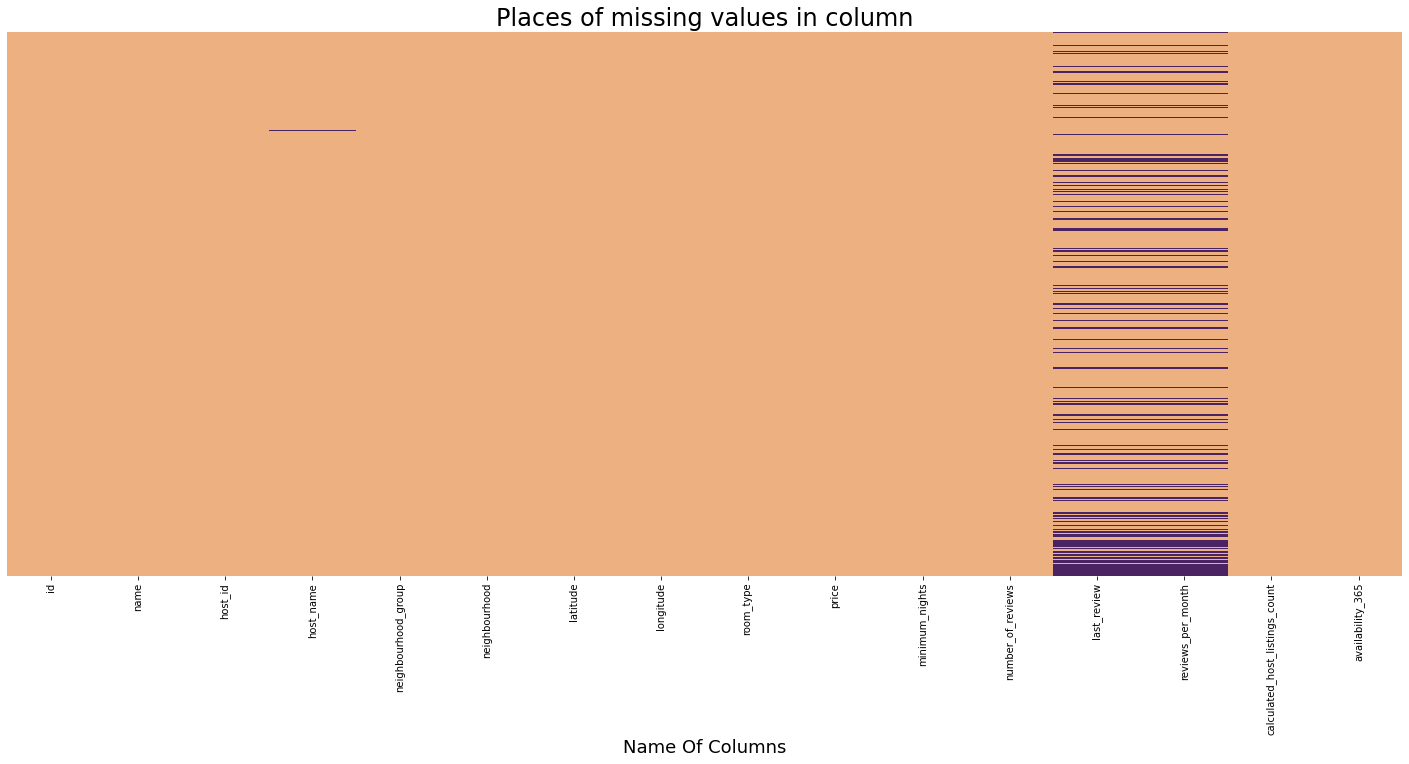

In [ ]:
# Visulaizing null values through heatmap.

plt.figure(figsize=(25, 10))
sns.heatmap(booking_df.isnull(), cbar=False, yticklabels=False,cmap='flare')
plt.xlabel("Name Of Columns", fontsize=18)
plt.title("Places of missing values in column", fontsize=24)
plt.show()

**As we can see from above the column 'name', 'host_name', 'last_review', 'reviews_per_month' has the missing values**

### **The describe( ) method returns description of the data in the DataFrame. If the DataFrame contains numerical data, the description contains these information for each column:** 
**count** - The number of not-empty values. <br>
**mean** - The average (mean) value. <br>
**std** - The standard deviation. 

In [ ]:
booking_df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


### **I'm copying the dataframe to keep the original safe and conduct the missing value check and EDA going forward**

In [ ]:
booking_df1 = booking_df.copy()

In [ ]:
# Checking the duplicates

booking_df1.duplicated().sum()

0

**We have 0 duplicated values**

### **Either we can drop the null values or we can fill it as per the requirement and I'm going to drop the 'ID' column as it's not needed for this project and fill the rest of the columns column 'name', 'host_name', 'last_review', 'reviews_per_month'**

In [ ]:
booking_df1.drop('id', axis = 1, inplace = True)
booking_df1.fillna({'name' : 'No_Name'}, inplace = True )
booking_df1.fillna({'host_name' : 'No_Name'}, inplace = True )
booking_df1.fillna({'last_review' : 'Not_Revieved'}, inplace = True )
booking_df1.fillna({'reviews_per_month' : 0}, inplace = True )

In [ ]:
booking_df1.isnull().sum()

name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [ ]:
booking_df1.dtypes

name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

**Yay! Missing Value Treatment is done**

### **Let's Get on With the EDA**

### **1. Which 'neighbourhood_group' has the highest number of AirBnb's ?**

In [ ]:
#checking the unique values of the neighbourhood_group

booking_df1['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

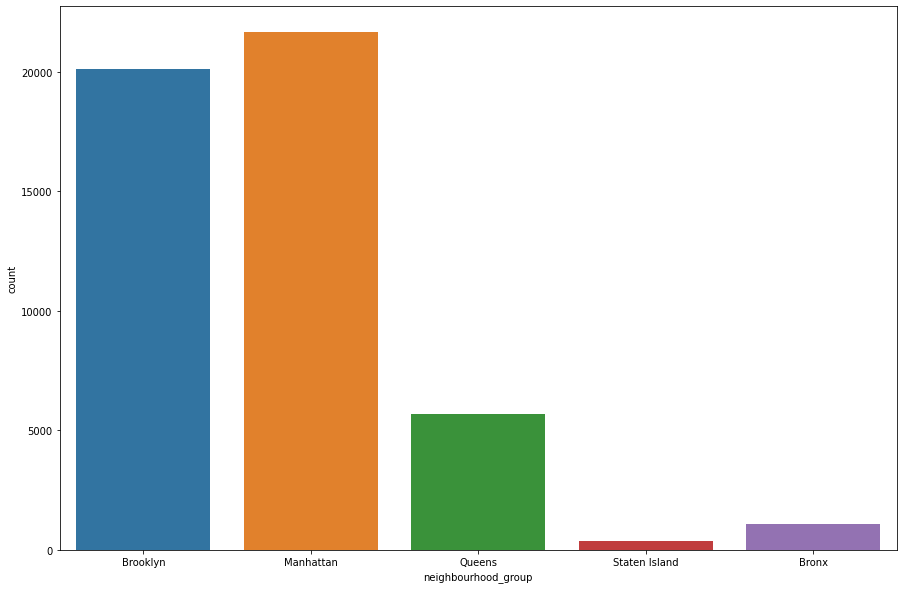

In [ ]:
#Plotting the neighbourhood_group

plt.figure(figsize = (15,10))
sns.countplot('neighbourhood_group', data = booking_df1)
plt.show()

**As we can see from the bar chart above Manhattan neighbourhood has the highest number of AirBnb's**

1. Manhattan
2. Brooklyn
3. Queens
4. Bronx
5. Staten Island

And Manhattan and Brooklyn has more than 75% of the AirBnb's.

In [ ]:
#Calculating the precise percentage AirBnb's are there in Manhattan and Brooklyn

neighbourhood = booking_df1.groupby('neighbourhood_group')['neighbourhood_group'].count()
neighbourhood = pd.DataFrame(neighbourhood)
neighbourhood.rename(columns = {'neighbourhood_group' : 'No of AirBnbs'}, inplace = True)
neighbourhood

,No of AirBnbs
neighbourhood_group,
Bronx,1091
Brooklyn,20104
Manhattan,21661
Queens,5666
Staten Island,373


In [ ]:
neighbourhood/(sum(neighbourhood['No of AirBnbs'] / 100))

,No of AirBnbs
neighbourhood_group,
Bronx,2.231312
Brooklyn,41.116679
Manhattan,44.301053
Queens,11.588097
Staten Island,0.762859




**Now Precisely we can 85.41 ~ 86% AirBnb's are there in Manhattan and Brooklyn**

### **2. Which type of properties are there in all the neighbourhood ?**

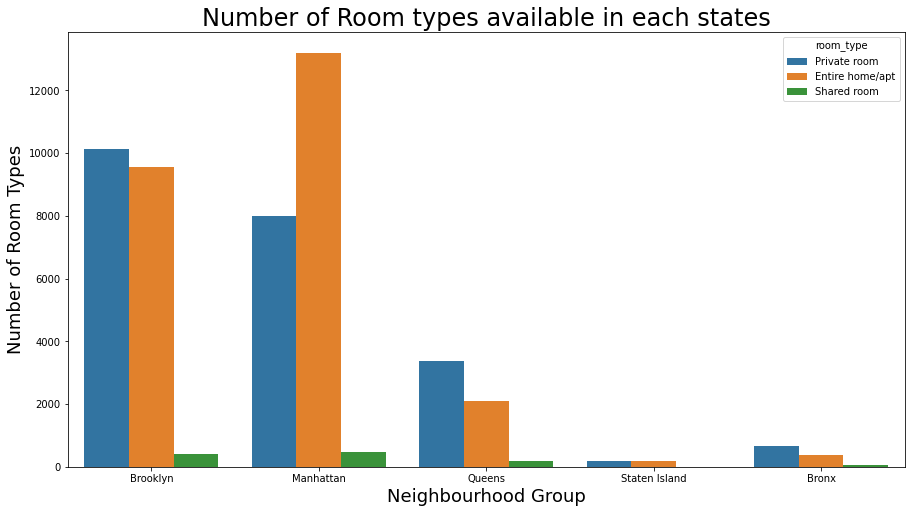

In [ ]:
#plotting the Number of Room types available in each states

plt.figure(figsize=(15,8))
sns.countplot(booking_df1['neighbourhood_group'],hue=booking_df1['room_type'])
plt.xlabel('Neighbourhood Group', fontsize = 18)
plt.ylabel('Number of Room Types',fontsize = 18)
plt.title('Number of Room types available in each states',fontsize = 24)
plt.show()

1. **Brooklyn** has Highest number of **Private Rooms**

2. **Manhattan** has Highest number of **Entire Home/Apartment**

3. **Manhattan** has Highest number of **Shared Room**

### **3. Which properties are the busiest Host in terms of Number of Bookings ?**

In [ ]:
# return which host has the highest bookings

highest_bookings= booking_df.groupby(['neighbourhood_group','name'])['name'].agg({'count'}).reset_index().rename(columns={'count': "Most_Bookings" }).sort_values(by='Most_Bookings',ascending=False)

top_ten_highest_bookings= highest_bookings[:10]

top_ten_highest_bookings

,neighbourhood_group,name,Most_Bookings
44574,Queens,Hillside Hotel,18
5259,Brooklyn,Brooklyn Apartment,12
12120,Brooklyn,Loft Suite @ The Box House Hotel,11
2826,Brooklyn,Artsy Private BR in Fort Greene Cumberland,10
15315,Brooklyn,Private room in Williamsburg,8
44610,Queens,Home away from home,8
7665,Brooklyn,Cozy Brooklyn Apartment,8
3381,Brooklyn,Beautiful Brooklyn Brownstone,8
15272,Brooklyn,Private room in Brooklyn,8
29998,Manhattan,Harlem Gem,7


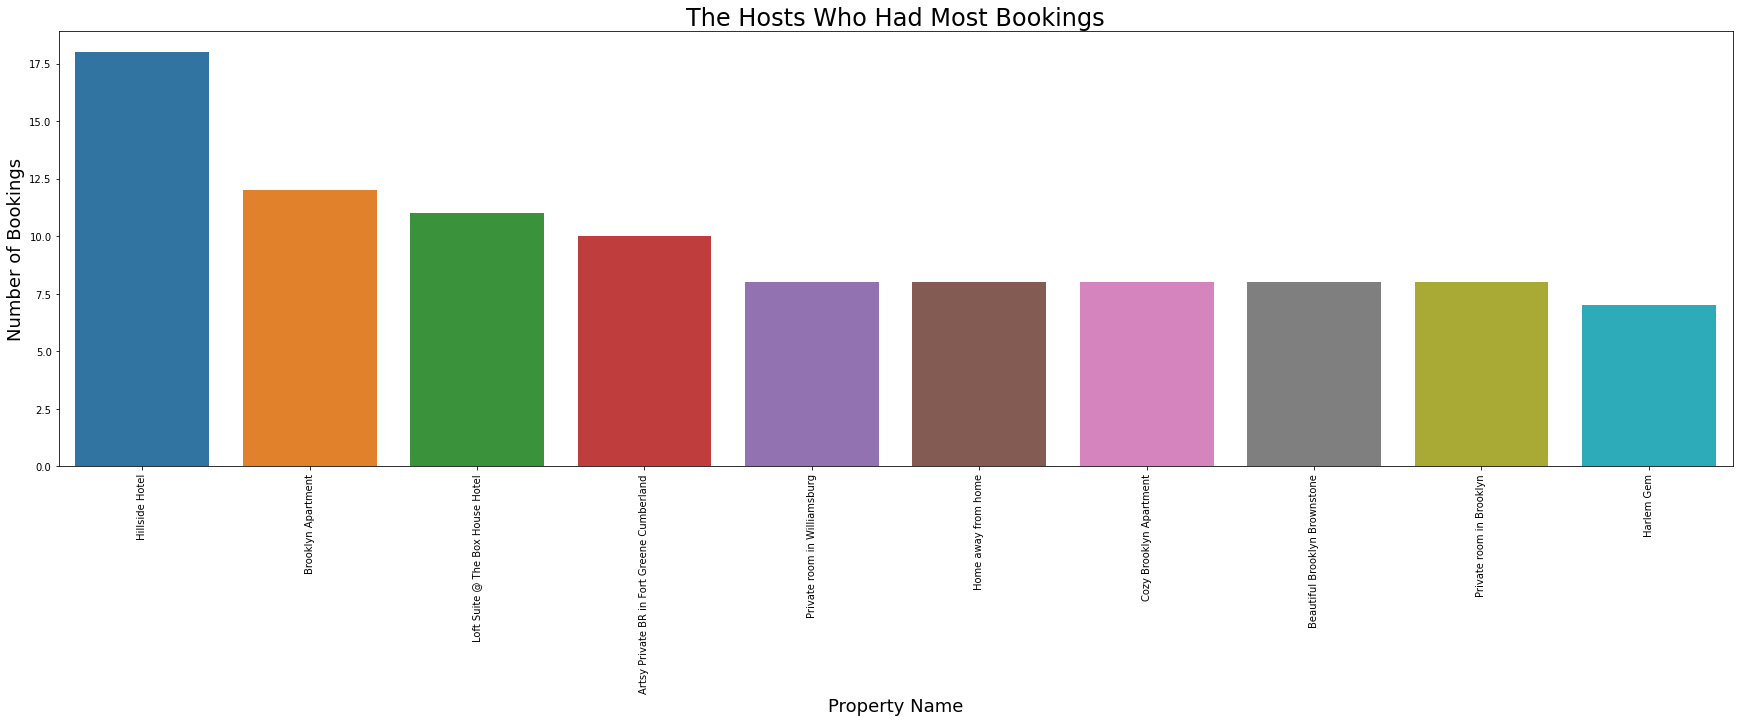

In [ ]:
#Visualizaing the top_ten_highest_bookings

plt.figure(figsize=(30,8))
sns.barplot(x = top_ten_highest_bookings['name'],y = top_ten_highest_bookings['Most_Bookings'])
plt.xlabel('Property Name', fontsize = 18)
plt.xticks(rotation = 90)
plt.ylabel('Number of Bookings',fontsize = 18)
plt.title("The Hosts Who Had Most Bookings",fontsize = 24)
plt.show()

**As we can see from above Hillside Hotel property in Queens had the most number of bookings followed by Brooklyn Apartment in Brooklyn and Loft Suite at Brooklyn.** 

### **4. Who are the busiest Host in terms of Number of Bookings with host name ?**

In [ ]:
host = booking_df1[['neighbourhood_group','host_name']].value_counts().reset_index().head(10)
host.rename(columns = {0 : 'Most_Bookings'}, inplace = True)
host

,neighbourhood_group,host_name,Most_Bookings
0,Manhattan,Sonder (NYC),327
1,Manhattan,Blueground,230
2,Manhattan,Michael,212
3,Manhattan,David,202
4,Brooklyn,Michael,159
5,Manhattan,John,151
6,Brooklyn,David,142
7,Manhattan,Kara,135
8,Manhattan,Mike,134
9,Manhattan,Alex,134


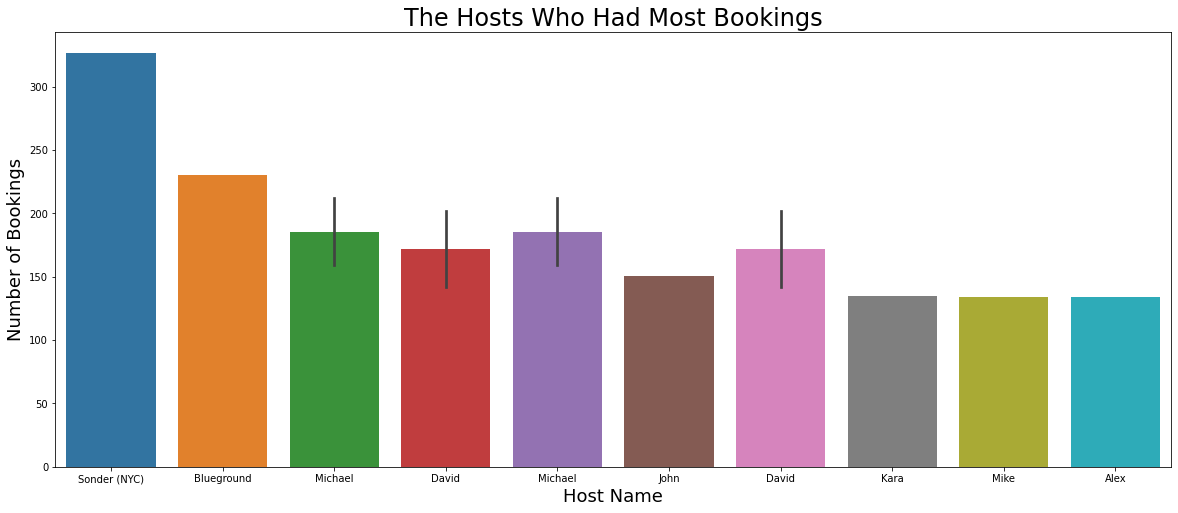

In [ ]:
#Visualizaing the busiest Host in terms of Number of Bookings with host name

plt.figure(figsize=(20,8))
sns.barplot(x = host['host_name'], y = host['Most_Bookings'] ,order = host['host_name'])
plt.xlabel('Host Name', fontsize = 18)
plt.ylabel('Number of Bookings',fontsize = 18)
plt.title("The Hosts Who Had Most Bookings",fontsize = 24)
plt.show()

**As we can see from above Sonder (NYC) at manhattan had the most number of bookings followed by Blueground at manhattan and Michael at manhattan.** 

### **5. If I choose Brooklyn Neigborhood to live there for 20 days. Let's check it will be cheaper to stay there compare to other neighborhoods or not.**

In [ ]:
import plotly.express as px

In [ ]:
brook_df = booking_df1.loc[booking_df1['neighbourhood_group'].isin(['Brooklyn', 'Manhattan', 'Queens', 'Bronx'])]

In [ ]:
fig = px.bar(x = 'neighbourhood_group',y = 'price', data_frame = brook_df.groupby(['neighbourhood_group']).mean().reset_index(), text='neighbourhood_group',
             color = 'neighbourhood_group',opacity = .8)
fig.update_traces(textfont=dict(size=15,color='White'))
fig.update_layout(title='Neigborhood based on the property prices',yaxis=dict(showgrid=False,showticklabels=True),autosize=False,width=800,height=500)
fig.show()

#### **From the above bar chart we can conclude:**

1. **Brooklyn is not the cheapest nor the costliest neighbourhood to stay**

2. **Manhattan is the costliest place to stay**

3. **Bronx is the cheapest neighbourhood to stay**

### **6. As we see Bronx neighborhood is the cheaper place to stay so which room type can I prefer and area(neighborhood) best to visit at Affordable cost.**

In [ ]:
bronx_data = brook_df.loc[brook_df.neighbourhood_group=='Bronx']

fig = px.bar(x='neighbourhood',y='price',data_frame=bronx_data.groupby(['neighbourhood','room_type']).mean().reset_index(),color='room_type',barmode='group',opacity=.7)
fig.update_layout(title='Bronx Room type and Properties to Stay in Bronx at Affordable Cost',yaxis_title='Average Price Per Night',yaxis=dict(showgrid=False,
        showticklabels=True),autosize=False,width=2000,height=700)
fig.show()

**From the above bar chart we can conclude:**

**1. Riverdale is the most expensive area to stay for both Private and Shared Rooms**

**2. City Island is the most expensive for Entire Home/ Apt**

**3. Cheapest or More Affordable Private room is available at Van Nest** 

**4. Cheapest or More Affordable Shared room is available at Morris Heights, Pehlam Gardens, Schuylerville and Van Nest** 

**5. Cheapest or More Affordable Entire Home/ Apt is available at Woodlawn** 

### **7. If i choose to stay in Manhattan, which room type can I prefer and area(neighborhood) best to visit at Affordable cost.**

In [ ]:
manhattan_data = brook_df.loc[brook_df.neighbourhood_group=='Manhattan']

fig = px.bar(x='neighbourhood',y='price',data_frame = manhattan_data.groupby(['neighbourhood','room_type']).mean().reset_index(),color='room_type',barmode='group',opacity=.7)
fig.update_layout(title='Manhattan Room type and Properties to Stay in Manhattan at Affordable Cost',yaxis_title='Average Price Per Night',yaxis=dict(showgrid=False,
        showticklabels=True),autosize=False,width=2000,height=700)
fig.show()

**From the above bar chart we can conclude:**

**1. Tribeca is the most expensive area to stay for Entire Home/ Apt**

**2. Midtown is the most expensive area to stay for Private Room**

**3. Financial District is the most expensive area to stay for Shared room**

**4. Cheapest or More Affordable Private room is available at Washington Heights** 

**5. Cheapest or More Affordable Shared room is available at Roosevelt Island** 

**6. Cheapest or More Affordable Entire Home/ Apt is available at Marble Hill** 

### **8. Assume I stayed in Manhattan for 20 days & I had a balance amount of 5000$ only.Then I decided to stay other 20 days at Queens. Is this amount is sufficient only for room expenses?**

In [ ]:
queens_df = booking_df1.loc[booking_df1['neighbourhood_group'].isin(['Queens'])]
price = queens_df['price'].mean()*20
price = round(price, 2)

if price <= 5000:
    print(f'The average amount to stay in Queens for 20 days is {price} $. We think your amount is more than Sufficient to stay there.')
else:
    print("The amount exceeds your budget plan for room in Queens.")

The average amount to stay in Queens for 20 days is 1990.35 $. We think your amount is more than Sufficient to stay there.


### **9. Since money is sufficient stay for 20 days, which type of luxury property can you select to stay at Queens**

In [ ]:
luxury_df = queens_df.groupby(['room_type'])['price'].mean()
luxury_df

In [ ]:
my_labels = ('Entire home/apt', 'Private room', 'Shared room')

In [ ]:
plt.figure(figsize = (15,8))
plt.pie(luxury_df, labels = my_labels, autopct = lambda p: '{:.02f}%({:.0f})'.format(p,(p/100)*luxury_df.sum()))
plt.title('Properties that are considered Luxury at Queens to Stay', fontsize = 20)
plt.legend()
plt.show()

**Entire home/Apt is considered to be luxury in the Queens Neighborhod so staying there for 20 days is both affordable and luxurious at 147 $.**

### **10. Most visited properties based on number of reviews**

In [ ]:
booking_df1.loc[:,['name','number_of_reviews']].groupby(['name'])['number_of_reviews'].sum().sort_values(ascending=False)[:10].reset_index().rename(columns={'name': "Property Names" })

,Property Names,number_of_reviews
0,Private Bedroom in Manhattan,666
1,Room near JFK Queen Bed,629
2,Beautiful Bedroom in Manhattan,617
3,Great Bedroom in Manhattan,607
4,Room Near JFK Twin Beds,576
5,Steps away from Laguardia airport,543
6,Manhattan Lux Loft.Like.Love.Lots.Look !,540
7,Cozy Room Family Home LGA Airport NO CLEANING FEE,510
8,Private brownstone studio Brooklyn,488
9,Loft Suite @ The Box House Hotel,481


In [ ]:
most_visited = booking_df1.groupby(['name'])['number_of_reviews'].sum().sort_values(ascending=False)[:10]

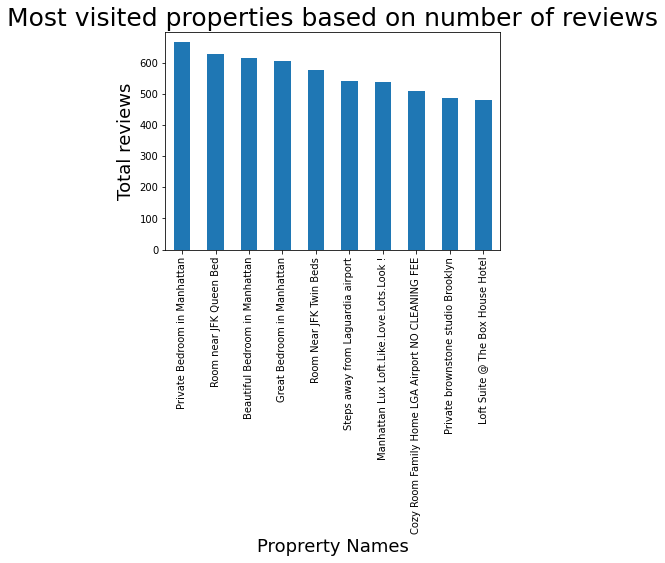

In [ ]:
most_visited.plot(kind='bar')

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (15,10)
plt.title('Most visited properties based on number of reviews', fontsize = 25)
plt.xlabel('Proprerty Names', fontsize = 18)
plt.ylabel('Total reviews', fontsize = 18)
plt.xticks(rotation = 90)
plt.show()

**Top 3 properties visited by People based on number of reviews are :**

**1. Private Bedroom in Manhattan**

**2. Room near JFK Queen Bed**

**3. Beautiful Bedroom in Manhattan**



### **11.check who has the potential to open an AirBnb franchise in Queens in coming days, consider the most number of reviews as metric?** 

In [ ]:
booking_df1.head(3)

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaT,0.00,1,365


In [ ]:
booking_df1.dtypes

name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [ ]:
booking_df1['last_review'] = pd.to_datetime(booking_df1['last_review'], errors='coerce')

In [ ]:
property_df = booking_df1.copy()
property_df['duration'] = round((property_df['number_of_reviews']/property_df['reviews_per_month']) / 12)
property_df['possible_year_of_start'] = property_df['last_review'].dt.year - property_df['duration']
property_df['possible_year_of_start'] = pd.to_datetime(property_df['possible_year_of_start'], format = '%Y').dt.year

In [ ]:
num_of_property_df = booking_df1.loc[:,['host_id','host_name']].groupby('host_id').agg({'host_name':'count'}).sort_values(by='host_name',ascending=False).rename(columns={'host_name':'number_of_property'})

In [ ]:
booking_df1.groupby('host_id').agg({'host_name':'count'}).sort_values(by='host_name',ascending=False).rename(columns={'host_name':'number_of_property'})

,number_of_property
host_id,
219517861,327
107434423,232
30283594,121
137358866,103
16098958,96
...,...
13540183,1
13538150,1
13535952,1


In [ ]:
#DataFrame to caputure the data for total number of property holding of Hosts in reviewed_df

num_of_property_df = property_df.groupby('host_id').agg({'host_name':'count'}).sort_values(by='host_name',ascending=False).rename(columns={'host_name':'number_of_property'})
df = property_df.copy()
property_df = df.merge(num_of_property_df,how='inner',on='host_id')

In [ ]:
property_df.head()

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,duration,possible_year_of_start,number_of_property
0,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,4.0,2014.0,6
1,Riomaggiore Room. Queen Bedroom in Bklyn Townh...,2787,John,Brooklyn,Bensonhurst,40.60951,-73.97622,Private room,99,1,21,2018-10-27,0.50,6,153,4.0,2014.0,6
2,Torre del Lago Room.,2787,John,Brooklyn,Gravesend,40.60755,-73.97410,Private room,79,1,17,2019-06-26,0.40,6,174,4.0,2015.0,6
3,Cinque Terre Room. Clean and Quiet Queen Bedroom,2787,John,Brooklyn,Gravesend,40.60810,-73.97541,Private room,149,1,24,2019-05-11,0.64,6,180,3.0,2016.0,6
4,"La Spezia room. Clean, quiet and comfortable bed",2787,John,Brooklyn,Bensonhurst,40.60951,-73.97642,Shared room,79,1,15,2018-09-29,0.43,6,180,3.0,2015.0,6


In [ ]:
busiest_host_queens = property_df.loc[property_df.neighbourhood_group=='Queens',['host_id','host_name','number_of_property','reviews_per_month','availability_365','price']].groupby(['host_id','host_name']).agg({'reviews_per_month':'sum','number_of_property':'count','availability_365':'median','price':'min'}).sort_values(by=['reviews_per_month','number_of_property','availability_365'],ascending=[False,False,False]).reset_index()[:20]
busiest_host_queens

,host_id,host_name,reviews_per_month,number_of_property,availability_365,price
0,232251881,Lakshmee,80.63,8,167.0,30
1,26432133,Danielle,68.02,5,338.0,38
2,156948703,Asad,56.44,6,338.5,52
3,156684502,Nalicia,54.38,3,26.0,50
4,37312959,Maya,53.53,5,163.0,32
5,187822288,Zahir,43.11,5,168.0,49
6,259796664,Santi,40.58,10,354.5,79
7,264092618,Ajmol,40.36,5,87.0,60
8,155691570,Mili,39.90,5,89.0,35
9,58391491,Juel,37.18,5,154.0,33


In [ ]:
property_df['year_of_review'] = property_df['last_review'].dt.year

In [ ]:
# Which neighbourhood is has incremental reviews YoY for Queens

dct1 = {}

for group in property_df.loc[property_df.neighbourhood_group=='Queens'].neighbourhood.unique():
  lst1 = []
  for year in list(range(2014, 2020)):
    avg_reviews_sum = property_df[(property_df['neighbourhood'] == group) & (property_df['year_of_review'] == year)]['reviews_per_month'].sum()
    lst1.append(avg_reviews_sum)
  dct1.update({group : lst1})
dct1
avg_review_df = pd.DataFrame(dct1, index=range(2014,2020))
avg_review_df

,Long Island City,Woodside,Flushing,Sunnyside,Ridgewood,Middle Village,Jamaica,Ditmars Steinway,Astoria,Queens Village,...,Corona,Neponsit,Hollis,Laurelton,Holliswood,Rosedale,Jamaica Hills,Douglaston,Little Neck,Breezy Point
2014,0.45,0.00,0.00,0.18,0.00,0.00,0.00,0.08,0.25,0.00,...,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2015,1.96,0.07,0.02,0.55,1.73,0.31,0.00,0.06,1.68,0.00,...,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2016,3.75,0.37,0.83,1.99,0.68,0.02,0.03,1.75,7.06,0.00,...,0.00,0.0,0.00,0.00,0.00,0.23,0.00,0.00,0.00,0.00
2017,5.49,1.58,7.04,3.09,5.84,0.00,5.08,3.17,13.13,0.14,...,0.52,0.0,0.14,0.00,0.00,0.52,0.17,0.00,0.00,0.00
2018,24.20,9.93,15.15,15.77,17.86,1.29,11.45,12.52,49.09,0.71,...,3.69,0.0,0.38,9.38,0.00,5.94,0.50,0.00,0.45,0.09
2019,580.01,275.30,796.80,392.36,404.42,50.02,588.00,355.38,830.02,160.19,...,114.18,4.8,19.24,30.15,0.83,130.01,22.54,9.67,0.55,0.35


In [ ]:
# Top 10 reviewed in Queens

avg_review_queens = avg_review_df.sum().sort_values(ascending=False)[:10].reset_index().rename(columns = {'index' : 'Properties Names', 0 : 'Average Reviews'})
avg_review_queens

,Properties Names,Average Reviews
0,Astoria,901.23
1,East Elmhurst,824.73
2,Flushing,819.84
3,Long Island City,615.86
4,Jamaica,604.56
5,Ridgewood,430.53
6,Sunnyside,413.94
7,Ditmars Steinway,372.96
8,Springfield Gardens,356.42
9,Elmhurst,318.89


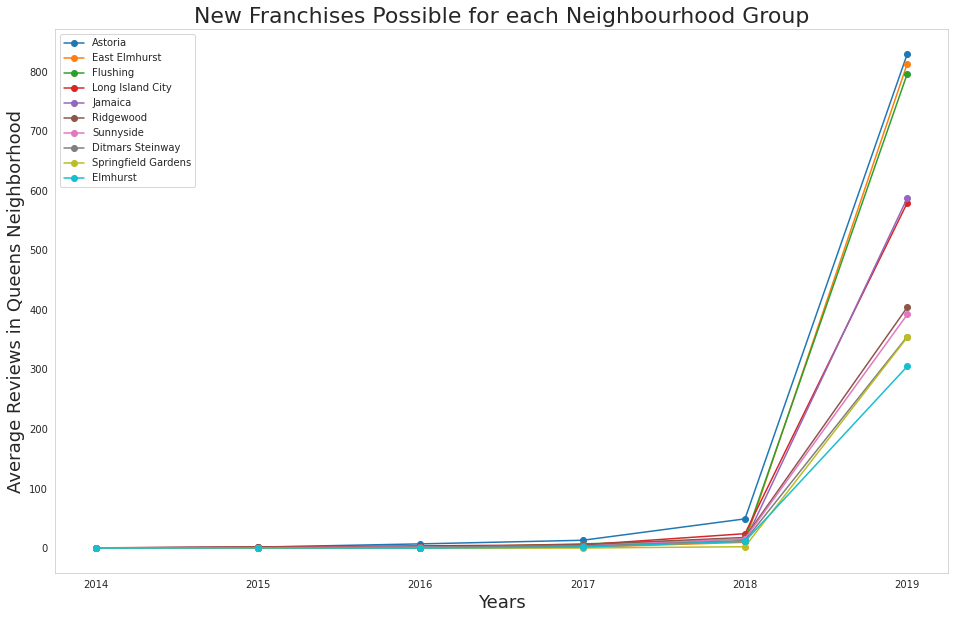

In [ ]:
plt.rcParams['figure.figsize'] = (16,10)
sns.set_style('whitegrid')
for average in avg_review_queens['Properties Names']:
  avg_review_df[average].plot(marker='o')
plt.xlabel('Years', fontsize = 18)
plt.ylabel('Average Reviews in Queens Neighborhood', fontsize = 18)
plt.title('New Franchises Possible for each Neighbourhood Group', fontsize = 22)
plt.locator_params(axis="y", nbins=10)
plt.grid()
plt.legend(loc='upper left')
plt.show()

**We observe that top reviewed neighbourhoods are :**

**Astoria** with average reviews of               901.27

**East Elmhurst** with average reviews of         824.73

**Flushing** with average reviews of              819.85

**Long Island City** with average reviews of      615.86

**Jamaica**  with average reviews of              604.56

**Ridgewood**  with average reviews of            430.54

**Sunnyside**  with average reviews of            413.95

**Ditmars Steinway**  with average reviews of     372.97

**Springfield Gardens** with average reviews of   356.42

**Elmhurst**         with average reviews of      318.89
    

**So, The Hosts with property listings over these neighbourhoods of Queens are more likely to have a new franchise in the near future.**

### **12.check who has the potential to open an AirBnb franchise in Manhattan in coming days, consider there most number of reviews as metric?** 

In [ ]:
busiest_host_manhattan = property_df.loc[property_df.neighbourhood_group=='Manhattan',['host_id','host_name','reviews_per_month','number_of_property','availability_365','price']].groupby(['host_id','host_name']).agg({'reviews_per_month':'sum','number_of_property':'count','availability_365':'median','price':'min'}).sort_values(by=['reviews_per_month','number_of_property','availability_365'],ascending=[False,False,False]).reset_index()[:20]
busiest_host_manhattan

,host_id,host_name,reviews_per_month,number_of_property,availability_365,price
0,219517861,Sonder (NYC),397.56,327,328.0,100
1,244361589,Row NYC,111.72,9,295.0,100
2,137274917,David,62.89,12,241.0,105
3,224414117,Gabriel,59.10,30,351.0,107
4,35524316,Yasu & Akiko,40.32,11,245.0,155
5,16677326,Alex And Zeena,39.49,12,353.5,85
6,253906467,Erik,39.23,9,348.0,60
7,30985759,Taz,34.92,6,298.5,55
8,59529529,Han,34.78,6,172.0,70
9,244559229,Stewart Hotel,34.04,9,317.0,100


In [ ]:
dct1 = {}

for group in property_df.loc[property_df.neighbourhood_group=='Manhattan'].neighbourhood.unique():
  lst1 = []
  for year in list(range(2012, 2020)):
    avg_reviews_sum = property_df[(property_df['neighbourhood'] == group) & (property_df['year_of_review'] == year)]['reviews_per_month'].sum()
    lst1.append(avg_reviews_sum)
  dct1.update({group : lst1})
dct1
avg_review_df = pd.DataFrame(dct1, index=range(2012,2020))
avg_review_df

,Midtown,Harlem,East Harlem,Murray Hill,Hell's Kitchen,Upper West Side,Chinatown,Lower East Side,West Village,Chelsea,...,Little Italy,Nolita,Two Bridges,Gramercy,Theater District,Tribeca,Battery Park City,Civic Center,Stuyvesant Town,Marble Hill
2012,0.00,0.40,0.00,0.00,0.00,0.01,0.00,0.00,0.10,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2013,0.00,0.04,0.01,0.00,0.13,0.45,0.00,0.02,0.12,0.00,...,0.00,0.26,0.00,0.07,0.00,0.00,0.00,0.00,0.00,0.00
2014,0.06,0.23,0.09,0.05,0.47,0.57,0.61,0.64,0.10,0.46,...,0.00,0.00,0.00,0.04,0.02,0.73,0.03,0.00,0.00,0.00
2015,2.35,5.34,1.73,1.03,2.33,7.40,0.46,2.39,1.92,2.15,...,0.28,0.56,0.00,0.89,0.30,0.48,0.56,0.05,0.00,0.02
2016,9.30,19.03,10.03,2.11,8.76,22.01,2.60,8.56,9.83,10.36,...,0.15,2.00,0.29,3.23,0.36,0.80,0.80,1.01,0.08,0.16
2017,16.79,42.21,14.11,4.33,28.90,30.38,7.86,16.88,10.69,17.71,...,0.38,4.41,0.31,3.98,2.88,3.37,1.44,1.38,1.01,0.00
2018,60.22,181.19,70.68,16.15,83.41,105.82,27.35,35.70,42.01,38.38,...,8.25,17.09,1.78,18.45,4.06,4.13,0.88,3.18,1.00,0.56
2019,1175.37,2707.79,1482.41,290.59,2694.79,1320.63,400.63,855.74,511.38,969.83,...,115.35,200.25,141.35,268.12,372.30,82.33,20.61,17.65,23.77,6.50


In [ ]:
avg_review_manhattan = avg_review_df.sum().sort_values(ascending=False)[:10].reset_index().rename(columns = {'index' : 'Properties Names', 0 : 'Average Reviews'})
avg_review_manhattan

,Properties Names,Average Reviews
0,Harlem,2956.23
1,Hell's Kitchen,2818.79
2,East Village,1668.17
3,East Harlem,1579.06
4,Upper East Side,1523.66
5,Upper West Side,1487.27
6,Midtown,1264.09
7,Chelsea,1038.89
8,Lower East Side,919.93
9,Washington Heights,876.70


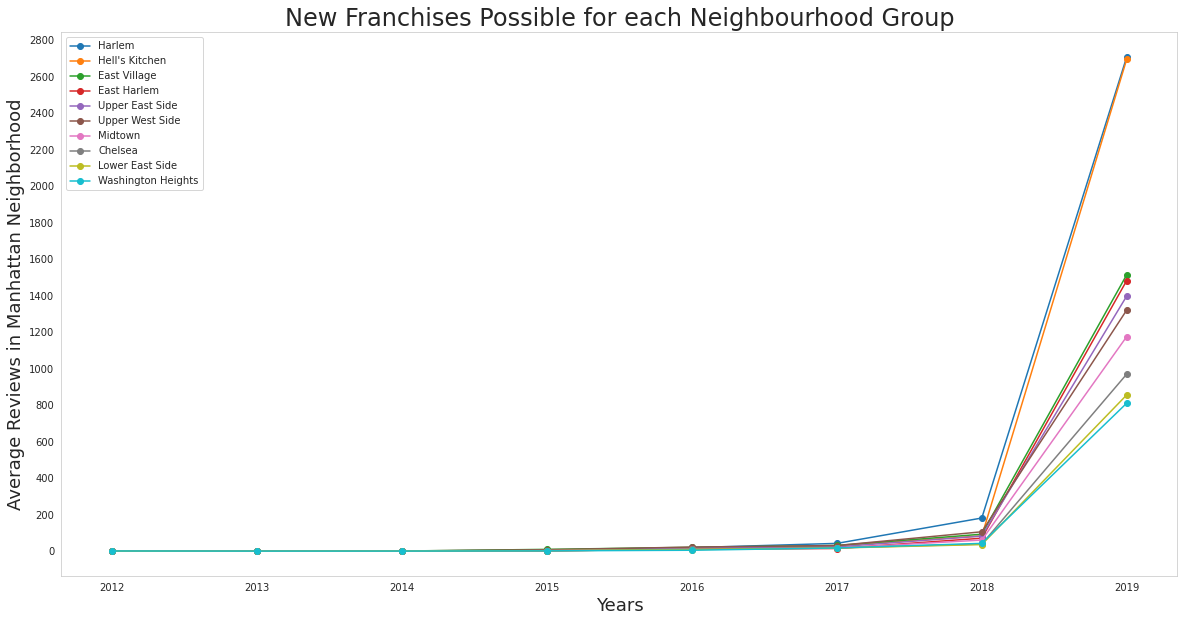

In [ ]:
plt.rcParams['figure.figsize'] = (20,10)
sns.set_style('whitegrid')
for average in avg_review_manhattan['Properties Names']:
  avg_review_df[average].plot(marker='o')
plt.xlabel('Years', fontsize = 18)
plt.ylabel('Average Reviews in Manhattan Neighborhood', fontsize = 18)
plt.title('New Franchises Possible for each Neighbourhood Group', fontsize = 24)
plt.locator_params(axis="y", nbins=20)
plt.grid()
plt.legend(loc='upper left')
plt.show()

**We observe that top reviewed neighbourhoods are :**

**Harlem** with average reviews of                2956.23

**Hell's Kitchen** with average reviews of        2818.79

**East Village** with average reviews of          1668.17

**East Harlem** with average reviews of           1579.06

**Upper East Side** with average reviews of       1523.66

**Upper West Side** with average reviews of       1487.27

**Midtown** with average reviews of               1264.09

**Chelsea** with average reviews of               1038.89

**Lower East Side** with average reviews of        919.93

**Washington Heights** with average reviews of     876.70

**So, The Hosts with property listings over these neighbourhoods of Manhattan are more likely to have a new franchise in the near future.**